# Analyzing Apple Stock Data

Welcome to this Jupyter Notebook, where we’ll explore the world of financial analysis using Apple Inc. (AAPL) stock data. In this analysis, we’ll leverage historical stock prices to gain insights into Apple’s performance and develop valuable trading indicators.

### What You Will Learn

In this notebook, we will:

1. **Load Apple Stock Data**: We’ll begin by importing the necessary libraries and loading the historical stock price data for Apple from a CSV file.
2. **Feature Engineering**: We will calculate various financial metrics, such as daily returns, moving averages, and other indicators that can help in making informed trading decisions.
3. **Data Visualization**: We will visualize these calculated metrics to better understand Apple’s stock trends over time.

### Why Analyze Stock Data?

Understanding stock data is crucial for making informed investment decisions. By analyzing historical prices and returns, we can uncover trends and patterns that may influence future stock performance. This analysis can help investors gauge market sentiment and devise effective trading strategies.

### Let's Get Started!

Now, let’s dive into the analysis by loading the stock data and performing some calculations. Follow along as we transform raw stock data into actionable insights!


### Step 1: Load Apple Stock Data

In this section, we will load the historical stock price data for Apple Inc. (AAPL) into our analysis. We'll be using the `pandas` library, which is a powerful tool for data manipulation and analysis in Python.

#### Code Explanation

1. **Importing Libraries**: We begin by importing the `pandas` library, which will help us read and handle our stock data efficiently.

2. **Reading the Data**: We use the `pd.read_csv()` function to read the data from a CSV file named `AAPL_data.csv`. This file should contain historical price data for Apple stock.

3. **Setting the Index**: The command `apple.set_index('date', inplace=True)` sets the 'date' column as the index of our DataFrame. This makes it easier to work with time series data, as we can reference stock prices by date directly.

    > **Note**: Once we set the index to 'date', the original 'date' column will no longer exist in the DataFrame. Therefore, it’s a good practice to perform this operation early in our analysis to keep our DataFrame organized.

### Let's Load the Data!
Now, let’s run the code to load the Apple stock data and prepare it for our analysis.


In [32]:
import pandas as pd

# Read data from a CSV file into a DataFrame
apple = pd.read_csv('AAPL_data.csv')
apple.set_index('date', inplace=True)#Command to set the index to date
#You can only call this once, without having to rerun the whole jupyter notebook - as once the function is called - 
#The column date would not exist anymore


### Step 2: Create a New Column for Tomorrow's Closing Price

In this step, we will create a new column in our DataFrame that represents the closing price of Apple stock for the next day. This will help us in analyzing daily price movements and calculating returns.

#### Code Explanation

1. **Creating the New Column**: The line `apple['CloseTom'] = apple['close'].shift(-1)` utilizes the `shift()` function to shift the 'close' prices up by one position. This means that each value in the 'CloseTom' column corresponds to the closing price of the following day.

    - For example, if today’s closing price is $150, then tomorrow’s closing price (in the 'CloseTom' column) will be reflected in today's row.

2. **Why Shift?**: This operation is essential for analyzing returns, as it allows us to compare today’s closing price with tomorrow’s closing price. By having this data available, we can compute the return of the stock from one day to the next.

3. **Viewing the Data**: Finally, we use `print(apple.head())` to display the first few rows of our updated DataFrame. This allows us to verify that our new column has been created correctly.

### Let's Check the Data!
Now, let’s run the code to create the 'CloseTom' column and inspect the updated DataFrame.


In [33]:
apple['CloseTom'] = apple['close'].shift(-1)
#Shifting the close price up by one using the shift function
print(apple.head())

               open     high      low    close     volume  Name  CloseTom
date                                                                     
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   68.5614
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   66.8428
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   66.7156
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   66.6556
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   65.7371


### Step 3: Calculate Price Difference

In this step, we will create a new column that represents the price difference between tomorrow's closing price and today's closing price.

#### Code Explanation

1. **Calculating Price Difference**: The line `apple['PriceDiff'] = apple['CloseTom'] - apple['close']` computes the difference between the 'CloseTom' (tomorrow's closing price) and the current day's 'close' price. This gives us insight into how much the stock price is expected to change.

2. **Why is This Useful?**: Understanding the price difference helps us analyze potential returns and make informed trading decisions.

3. **Viewing the Data**: We use `print(apple.head())` to display the first few rows of the updated DataFrame to ensure our new 'PriceDiff' column has been added correctly.

### Let's Calculate the Price Difference!
Now, let’s run the code to compute the 'PriceDiff' and check our DataFrame.


In [34]:
apple['PriceDiff'] = apple['CloseTom'] - apple['close']
print(apple.head())

               open     high      low    close     volume  Name  CloseTom  \
date                                                                        
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   68.5614   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   66.8428   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   66.7156   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   66.6556   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   65.7371   

            PriceDiff  
date                   
2013-02-08     0.7072  
2013-02-11    -1.7186  
2013-02-12    -0.1272  
2013-02-13    -0.0600  
2013-02-14    -0.9185  


### Step 4: Calculate Daily Return

In this step, we will compute the daily return of Apple stock based on the price difference.

#### Code Explanation

1. **Calculating Return**: The line `apple['Return'] = apple['PriceDiff'] / apple['close']` calculates the daily return by dividing the 'PriceDiff' (price change) by the current day's 'close' price. This gives us the percentage change in stock price.

2. **Why is This Important?**: Calculating returns helps us evaluate the stock's performance and understand potential gains or losses.

3. **Viewing the Data**: We use `print(apple.head())` to display the first few rows of the DataFrame, allowing us to verify that our new 'Return' column has been correctly added.

### Let's Calculate the Daily Return!
Now, let’s run the code to compute the 'Return' and check our updated DataFrame.


In [35]:
apple['Return'] = apple['PriceDiff']/apple['close']
print(apple.head())

               open     high      low    close     volume  Name  CloseTom  \
date                                                                        
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   68.5614   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   66.8428   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   66.7156   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   66.6556   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   65.7371   

            PriceDiff    Return  
date                             
2013-02-08     0.7072  0.010422  
2013-02-11    -1.7186 -0.025067  
2013-02-12    -0.1272 -0.001903  
2013-02-13    -0.0600 -0.000899  
2013-02-14    -0.9185 -0.013780  


### Step 5: Determine Price Direction

In this step, we will create a new column that indicates the direction of the price movement.

#### Code Explanation

1. **Adding the 'Direction' Column**: The line 
   ```python
   apple['Direction'] = [1 if apple.loc[i, 'PriceDiff'] > 0 else -1 for i in apple.index]


In [36]:
# Add a 'Direction' column: 
# - Assign 1 if 'PriceDiff' is positive (price went up)
# - Assign -1 if 'PriceDiff' is negative (price went down)
apple['Direction'] = [1 if apple.loc[i, 'PriceDiff'] > 0 else -1 for i in apple.index]

# Display the first 5 rows of the updated DataFrame to check the new 'Direction' column
print(apple.head())


               open     high      low    close     volume  Name  CloseTom  \
date                                                                        
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   68.5614   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   66.8428   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   66.7156   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   66.6556   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   65.7371   

            PriceDiff    Return  Direction  
date                                        
2013-02-08     0.7072  0.010422          1  
2013-02-11    -1.7186 -0.025067         -1  
2013-02-12    -0.1272 -0.001903         -1  
2013-02-13    -0.0600 -0.000899         -1  
2013-02-14    -0.9185 -0.013780         -1  


### Step 6: Calculate and Plot Moving Averages

In this step, we will calculate and visualize the moving averages of Apple's stock prices to identify trends.

1. **Calculating Moving Averages**: 
   - We create two new columns: the **40-day moving average** (MA40) for short-term trends and the **200-day moving average** (MA200) for long-term trends.

2. **Plotting the Data**: 
   - We visualize the moving averages alongside the closing price to see how they interact over time.

3. **Enhancing the Plot**: 
   - We add a **title**, **labels**, and a **legend** to provide context for the chart.

4. **Displaying the Plot**: 
   - Finally, we render the plot to analyze the trends visually.

### Visualizing Trends with Moving Averages
Let’s run the code to see how Apple's stock prices compare to the moving averages.


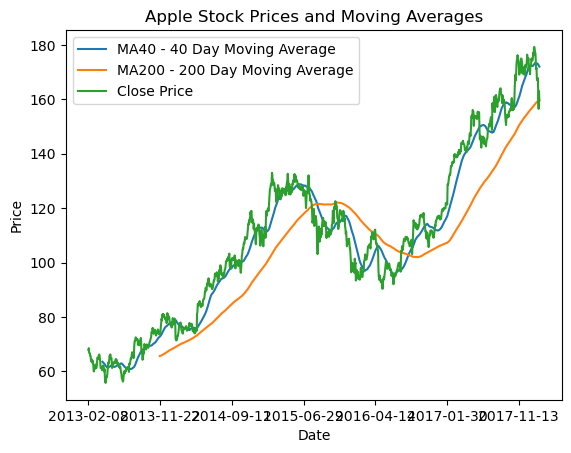

In [42]:
import matplotlib.pyplot as plt

# Calculate moving averages
apple['MA40'] = apple['close'].rolling(40).mean()
apple['MA200'] = apple['close'].rolling(200).mean()

# Plot the moving averages and closing price
apple['MA40'].plot(label='MA40 - 40 Day Moving Average')
apple['MA200'].plot(label='MA200 - 200 Day Moving Average')
apple['close'].plot(label='Close Price')

# Add title, labels, and legend
plt.title('Apple Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()  # This shows the key/legend

# Display the plot
plt.show()


### Step 7: Create Shares Column

We add a new column called **Shares** to indicate our trading signals:
- **1** if the **40-day moving average** (MA40) is greater than the **200-day moving average** (MA200), suggesting a buy signal.
- **0** otherwise, indicating no action.

This helps us track potential buying opportunities based on moving averages.


In [44]:
apple['Shares'] = [ 1 if apple.loc[i,'MA40'] > apple.loc[i,'MA200'] else 0 for i in apple.index]
print(apple.tail())

               open    high       low   close    volume  Name  CloseTom  \
date                                                                      
2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL    160.50   
2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL    156.49   
2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL    163.03   
2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL    159.54   
2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL       NaN   

            PriceDiff    Return  Direction       MA40      MA200  Shares  
date                                                                      
2018-02-01      -7.28 -0.043390         -1  172.97175  159.41200       1  
2018-02-02      -4.01 -0.024984         -1  172.74325  159.51110       1  
2018-02-05       6.54  0.041792          1  172.43025  159.58135       1  
2018-02-06      -3.49 -0.021407         -1  172.27300  159.68515       1  
2018-02-07        NaN   

### Step 8: Calculate Profit

We create a **Profit** column to evaluate our trading performance:
- If we are holding the stock (**Shares == 1**), the profit is calculated as the difference between the **next day's close price** and the **current close price**.
- If we aren't holding the stock, the profit is set to **0**.

This helps us assess the gains or losses from our trading signals.


In [46]:
# Calculate the profit for each row in the DataFrame
apple['Profit'] = [
    # If we hold the stock (Shares == 1), calculate the profit
    apple.loc[i, 'CloseTom'] - apple.loc[i, 'close'] 
    # If we don't hold the stock, assign a profit of 0
    if apple.loc[i, 'Shares'] == 1 
    else 0 
    for i in apple.index  # Iterate through each index in the DataFrame
]

# Print the last 5 rows of the DataFrame to check the new 'Profit' column
print(apple.tail())

               open    high       low   close    volume  Name  CloseTom  \
date                                                                      
2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL    160.50   
2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL    156.49   
2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL    163.03   
2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL    159.54   
2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL       NaN   

            PriceDiff    Return  Direction       MA40      MA200  Shares  \
date                                                                       
2018-02-01      -7.28 -0.043390         -1  172.97175  159.41200       1   
2018-02-02      -4.01 -0.024984         -1  172.74325  159.51110       1   
2018-02-05       6.54  0.041792          1  172.43025  159.58135       1   
2018-02-06      -3.49 -0.021407         -1  172.27300  159.68515       1   
2018-02-07        

### Step 9: Calculate Wealth

We create a **Wealth** column by calculating the **cumulative sum** of the **Profit** column. This shows the total gains or losses over time, helping us track overall performance of our trading strategy.


In [47]:
apple['Wealth'] = apple['Profit'].cumsum()
apple.tail()

,open,high,low,close,volume,Name,CloseTom,PriceDiff,Return,Direction,MA40,MA200,Shares,Profit,Wealth
date,,,,,,,,,,,,,,,
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,160.50,-7.28,-0.043390,-1,172.97175,159.41200,1,-7.28,84.2421
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,156.49,-4.01,-0.024984,-1,172.74325,159.51110,1,-4.01,80.2321
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,163.03,6.54,0.041792,1,172.43025,159.58135,1,6.54,86.7721
2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,159.54,-3.49,-0.021407,-1,172.27300,159.68515,1,-3.49,83.2821
2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,NaN,NaN,NaN,-1,172.02725,159.76465,1,NaN,NaN


## Tesla Stock Data Analysis

In this section, we'll replicate our analysis for Apple stock with Tesla stock data. By following the same steps, you can explore how Tesla's stock behaves over time and how different indicators can inform trading decisions.

### Steps to Follow

1. Load Tesla stock data into a DataFrame.
2. Set the date column as the index.
3. Create a new column for the closing price of the next day.
4. Calculate the price difference between today’s close and tomorrow’s close.
5. Calculate the daily return based on the price difference.
6. Create a direction column to indicate whether the price went up or down.
7. Calculate the 40-day and 200-day moving averages.
8. Determine when to hold shares based on the moving averages.
9. Calculate profit from holding the stock and track cumulative wealth.

Now, let's get started with the code!



In [ ]:


# Step 1: Load Tesla stock data into a DataFrame


# Step 2: Set the date column as the index


# Step 3: Create a new column for the closing price of the next day


# Step 4: Calculate the price difference


# Step 5: Calculate the daily return


# Step 6: Create a direction column to indicate price movement


# Step 7: Calculate the 40-day and 200-day moving averages


# Step 8: Determine when to hold shares based on moving averages


# Step 9: Calculate profit from holding the stock

# Print the last 5 rows to verify


# Calculate cumulative wealth

